In [61]:
import pandas as pd
import numpy as np
import operator
#from ngram import NGram
from nltk.tokenize import sent_tokenize, word_tokenize
from bs4 import BeautifulSoup
from nltk.corpus import stopwords
import re
import string
from nltk import pos_tag
from nltk.tokenize import TweetTokenizer
import matplotlib.pyplot as plt; plt.rcdefaults()
import warnings
warnings.filterwarnings('ignore')
import nltk
nltk.download('stopwords')
import nltk
from collections import Counter
from nltk import tokenize
nltk.download('punkt')
import re
import nltk
from nltk.probability import FreqDist
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
import string
eng_stopwords = stopwords.words('english')
import gc

from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.decomposition import TruncatedSVD

[nltk_data] Downloading package stopwords to /home/user/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to /home/user/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


In [4]:
train_df=pd.read_csv("train.csv")

In [6]:
test_df=pd.read_csv("test.csv")

In [7]:
sample_submission=pd.read_csv("sample_submission.csv")

In [8]:
train_df.head(5)

,qa_id,question_title,question_body,question_user_name,question_user_page,answer,answer_user_name,answer_user_page,url,category,...,question_well_written,answer_helpful,answer_level_of_information,answer_plausible,answer_relevance,answer_satisfaction,answer_type_instructions,answer_type_procedure,answer_type_reason_explanation,answer_well_written
0,0,What am I losing when using extension tubes in...,After playing around with macro photography on...,ysap,https://photo.stackexchange.com/users/1024,"I just got extension tubes, so here's the skin...",rfusca,https://photo.stackexchange.com/users/1917,http://photo.stackexchange.com/questions/9169/...,LIFE_ARTS,...,1.000000,1.000000,0.666667,1.000000,1.000000,0.800000,1.0,0.000000,0.000000,1.000000
1,1,What is the distinction between a city and a s...,I am trying to understand what kinds of places...,russellpierce,https://rpg.stackexchange.com/users/8774,It might be helpful to look into the definitio...,Erik Schmidt,https://rpg.stackexchange.com/users/1871,http://rpg.stackexchange.com/questions/47820/w...,CULTURE,...,0.888889,0.888889,0.555556,0.888889,0.888889,0.666667,0.0,0.000000,0.666667,0.888889
2,2,Maximum protusion length for through-hole comp...,I'm working on a PCB that has through-hole com...,Joe Baker,https://electronics.stackexchange.com/users/10157,Do you even need grooves? We make several pro...,Dwayne Reid,https://electronics.stackexchange.com/users/64754,http://electronics.stackexchange.com/questions...,SCIENCE,...,0.777778,0.777778,0.555556,1.000000,1.000000,0.666667,0.0,0.333333,1.000000,0.888889
3,3,Can an affidavit be used in Beit Din?,"An affidavit, from what i understand, is basic...",Scimonster,https://judaism.stackexchange.com/users/5151,"Sending an ""affidavit"" it is a dispute between...",Y e z,https://judaism.stackexchange.com/users/4794,http://judaism.stackexchange.com/questions/551...,CULTURE,...,0.888889,0.833333,0.333333,0.833333,1.000000,0.800000,0.0,0.000000,1.000000,1.000000
4,5,How do you make a binary image in Photoshop?,I am trying to make a binary image. I want mor...,leigero,https://graphicdesign.stackexchange.com/users/...,Check out Image Trace in Adobe Illustrator. \n...,q2ra,https://graphicdesign.stackexchange.com/users/...,http://graphicdesign.stackexchange.com/questio...,LIFE_ARTS,...,1.000000,1.000000,0.666667,1.000000,1.000000,0.800000,1.0,0.000000,1.000000,1.000000


In [11]:
print('Number of data   points in train data : ', train_df.shape[0])
print('Number of data points in test data : ', test_df.shape[0])
print('Number of features : ', train_df.shape[1])
print('Features : ', train_df.columns.values)


Number of data   points in train data :  6079
Number of data points in test data :  476
Number of features :  41
Features :  ['qa_id' 'question_title' 'question_body' 'question_user_name'
 'question_user_page' 'answer' 'answer_user_name' 'answer_user_page' 'url'
 'category' 'host' 'question_asker_intent_understanding'
 'question_body_critical' 'question_conversational'
 'question_expect_short_answer' 'question_fact_seeking'
 'question_has_commonly_accepted_answer' 'question_interestingness_others'
 'question_interestingness_self' 'question_multi_intent'
 'question_not_really_a_question' 'question_opinion_seeking'
 'question_type_choice' 'question_type_compare'
 'question_type_consequence' 'question_type_definition'
 'question_type_entity' 'question_type_instructions'
 'question_type_procedure' 'question_type_reason_explanation'
 'question_type_spelling' 'question_well_written' 'answer_helpful'
 'answer_level_of_information' 'answer_plausible' 'answer_relevance'
 'answer_satisfaction' '

# Preprocessing train data

In [12]:
# Checking for missing values

missing_data = pd.DataFrame({'total_missing': train_df.isnull().sum(), 'perc_missing': (train_df.isnull().sum()/6000)*100})
missing_data

,total_missing,perc_missing
qa_id,0,0.0
question_title,0,0.0
question_body,0,0.0
question_user_name,0,0.0
question_user_page,0,0.0
answer,0,0.0
answer_user_name,0,0.0
answer_user_page,0,0.0
url,0,0.0
category,0,0.0


# Checking for duplicates

In [13]:
train_df.drop_duplicates(keep='first',inplace=True)

In [14]:
test_df.drop_duplicates(keep='first',inplace=True)

In [15]:
#Checking data types of the column
train_df.dtypes

qa_id                                      int64
question_title                            object
question_body                             object
question_user_name                        object
question_user_page                        object
answer                                    object
answer_user_name                          object
answer_user_page                          object
url                                       object
category                                  object
host                                      object
question_asker_intent_understanding      float64
question_body_critical                   float64
question_conversational                  float64
question_expect_short_answer             float64
question_fact_seeking                    float64
question_has_commonly_accepted_answer    float64
question_interestingness_others          float64
question_interestingness_self            float64
question_multi_intent                    float64
question_not_really_

In [18]:
train_df[targets].describe()

,question_asker_intent_understanding,question_body_critical,question_conversational,question_expect_short_answer,question_fact_seeking,question_has_commonly_accepted_answer,question_interestingness_others,question_interestingness_self,question_multi_intent,question_not_really_a_question,...,question_well_written,answer_helpful,answer_level_of_information,answer_plausible,answer_relevance,answer_satisfaction,answer_type_instructions,answer_type_procedure,answer_type_reason_explanation,answer_well_written
count,6079.000000,6079.000000,6079.000000,6079.000000,6079.000000,6079.000000,6079.000000,6079.000000,6079.000000,6079.000000,...,6079.000000,6079.000000,6079.000000,6079.000000,6079.000000,6079.000000,6079.000000,6079.000000,6079.000000,6079.000000
mean,0.892663,0.595301,0.057301,0.698525,0.772633,0.793689,0.587478,0.507275,0.238745,0.004469,...,0.799931,0.925408,0.654823,0.960054,0.968626,0.854680,0.479547,0.130641,0.502468,0.908254
std,0.132047,0.219470,0.182196,0.350938,0.303023,0.336622,0.135900,0.185987,0.335057,0.045782,...,0.178420,0.114836,0.107666,0.086926,0.074631,0.130743,0.422921,0.225718,0.407097,0.100708
min,0.333333,0.333333,0.000000,0.000000,0.000000,0.000000,0.333333,0.333333,0.000000,0.000000,...,0.333333,0.333333,0.333333,0.333333,0.333333,0.200000,0.000000,0.000000,0.000000,0.333333
25%,0.777778,0.444444,0.000000,0.500000,0.666667,0.666667,0.444444,0.333333,0.000000,0.000000,...,0.666667,0.888889,0.666667,1.000000,1.000000,0.800000,0.000000,0.000000,0.000000,0.888889
50%,0.888889,0.555556,0.000000,0.666667,1.000000,1.000000,0.555556,0.444444,0.000000,0.000000,...,0.833333,1.000000,0.666667,1.000000,1.000000,0.866667,0.500000,0.000000,0.500000,0.888889
75%,1.000000,0.777778,0.000000,1.000000,1.000000,1.000000,0.666667,0.666667,0.333333,0.000000,...,1.000000,1.000000,0.666667,1.000000,1.000000,0.933333,1.000000,0.333333,1.000000,1.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [32]:
import sys
!{sys.executable} -m pip install seaborn

  Using cached https://files.pythonhosted.org/packages/a8/76/220ba4420459d9c4c9c9587c6ce607bf56c25b3d3d2de62056efe482dadc/seaborn-0.9.0-py3-none-any.whl


In [33]:
import seaborn as sns



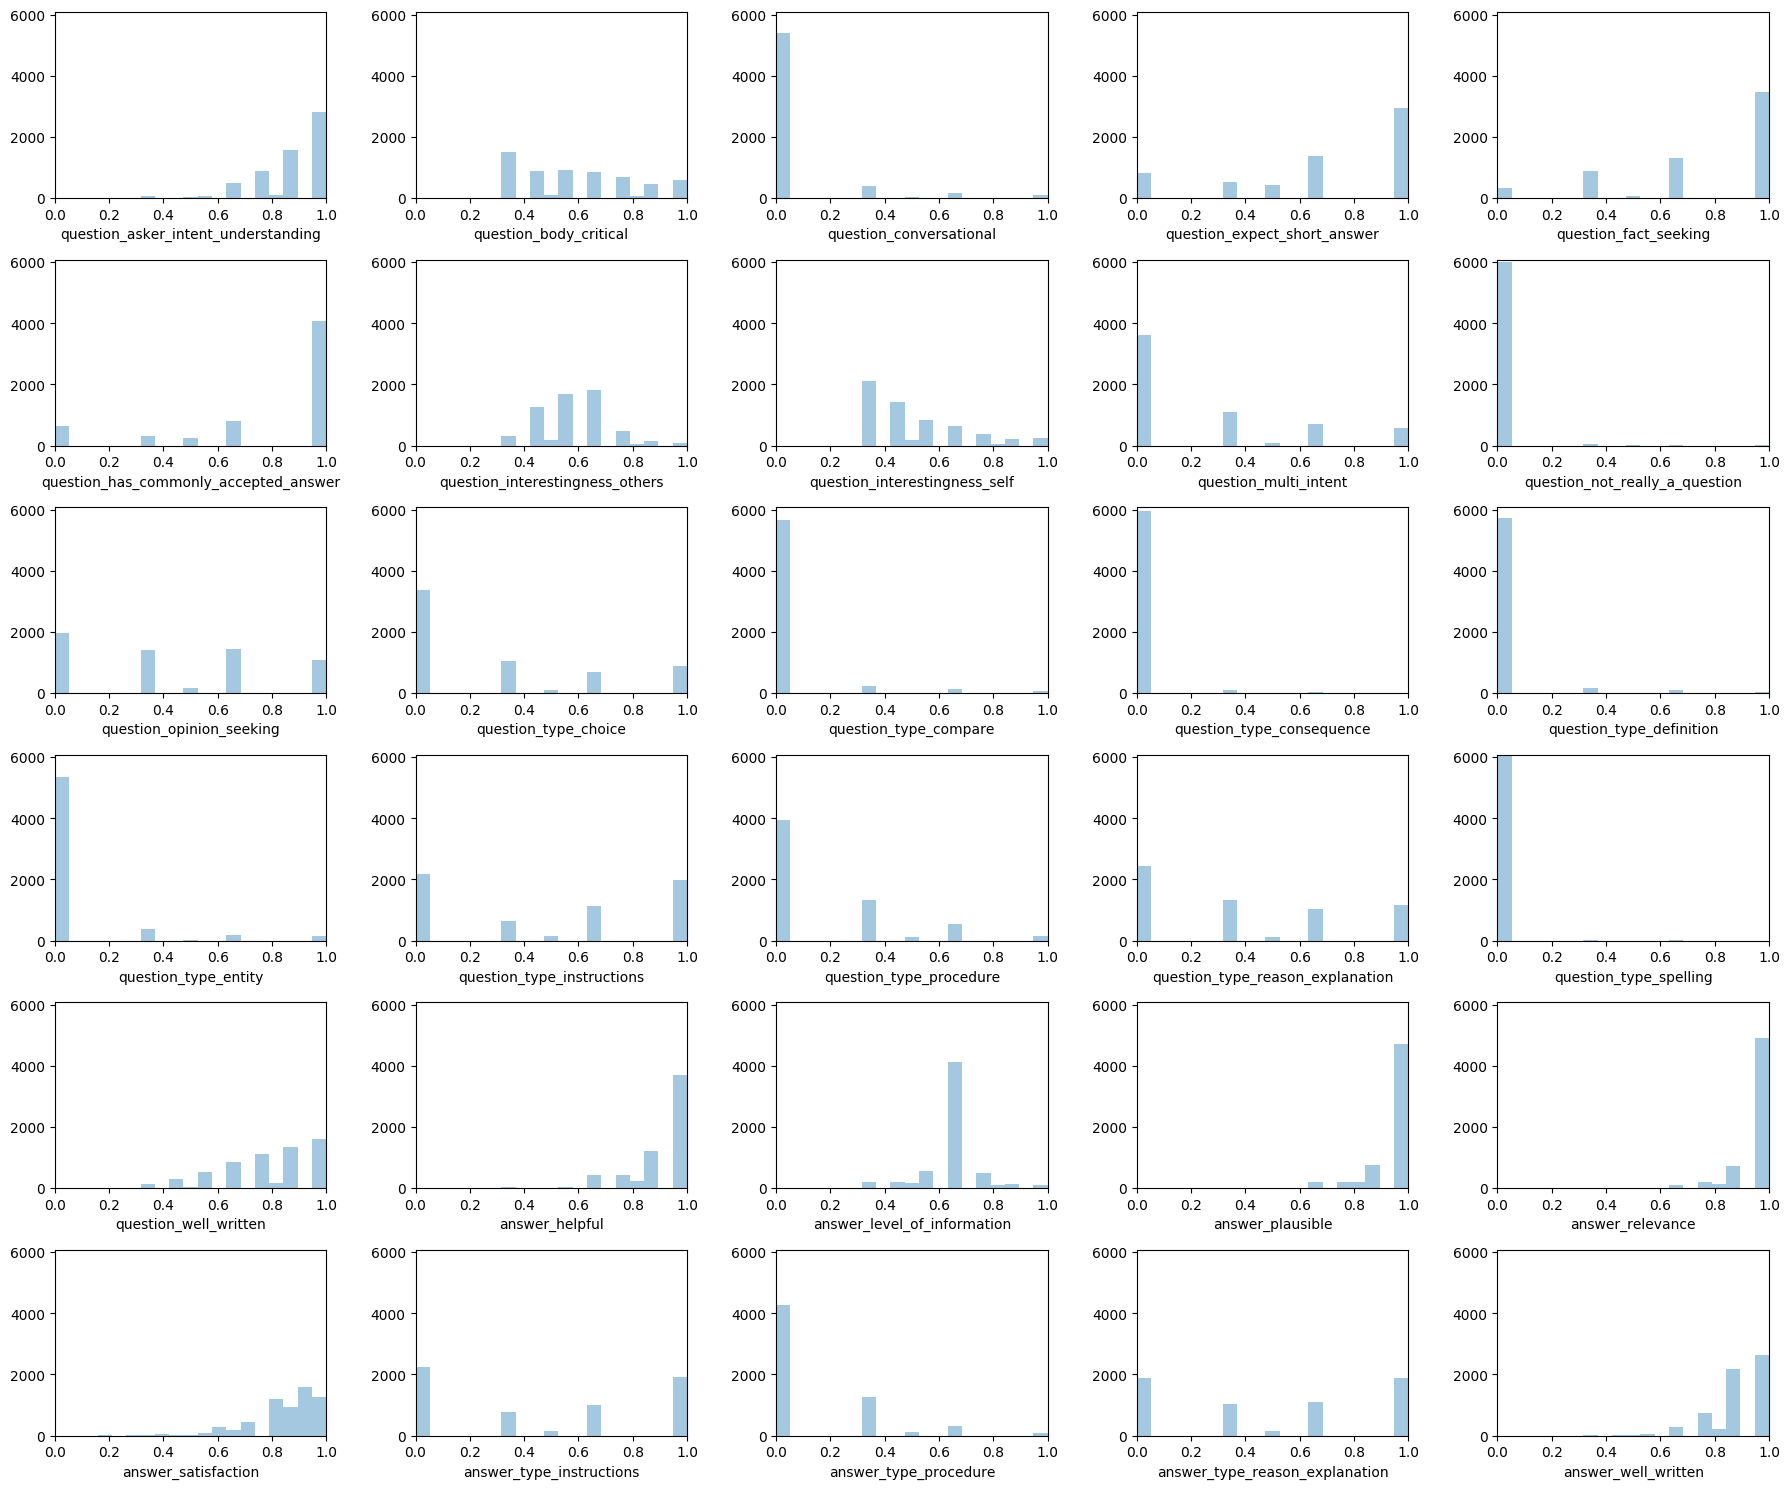

In [35]:
fig, axes = plt.subplots(6, 5, figsize=(18, 15))
axes = axes.ravel()
bins = np.linspace(0, 1, 20)

for i, col in enumerate(targets):
    ax = axes[i]
    sns.distplot(train_df[col], label=col, kde=False, bins=bins, ax=ax)
    # ax.set_title(col)
    ax.set_xlim([0, 1])
    ax.set_ylim([0, 6079])
plt.tight_layout()
plt.show()

plt.close()

In [39]:

import sys
!{sys.executable} -m pip install matplotlib-venn


     |████████████████████████████████| 40kB 106kB/s eta 0:00:01
  Created wheel for matplotlib-venn: filename=matplotlib_venn-0.11.5-cp36-none-any.whl size=32396 sha256=f22bbdc51cc617be1e1833395b86a3fe77b29fb7b6665c745fdd0a956606b726
  Stored in directory: /home/user/.cache/pip/wheels/d8/88/2f/e41518cb16e58109e8d14dc5dd7ef8166c82dce86c7c6d6c80
Successfully built matplotlib-venn


In [42]:
from matplotlib_venn import venn2

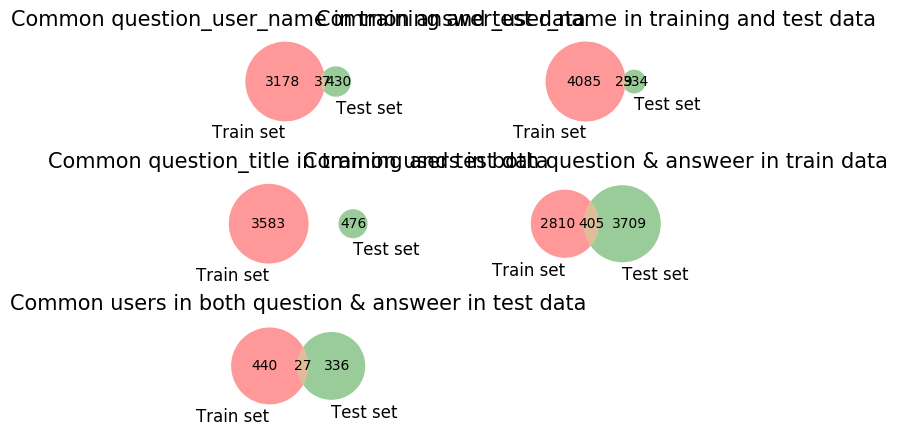

In [44]:
plt.subplot(321)
venn2([set(train_df.question_user_name.unique()), set(test_df.question_user_name.unique())], set_labels = ('Train set', 'Test set') )
plt.title("Common question_user_name in training and test data", fontsize=15)
#plt.show()

#plt.figure(figsize=(15,8))
plt.subplot(322)
venn2([set(train_df.answer_user_name.unique()), set(test_df.answer_user_name.unique())], set_labels = ('Train set', 'Test set') )
plt.title("Common answer_user_name in training and test data", fontsize=15)
#plt.show()

#plt.figure(figsize=(15,8))
plt.subplot(323)
venn2([set(train_df.question_title.unique()), set(test_df.question_title.unique())], set_labels = ('Train set', 'Test set') )
plt.title("Common question_title in training and test data", fontsize=15)
#plt.show()

#plt.figure(figsize=(15,8))
plt.subplot(324)
venn2([set(train_df.question_user_name.unique()), set(train_df.answer_user_name.unique())], set_labels = ('Train set', 'Test set') )
plt.title("Common users in both question & answeer in train data", fontsize=15)

#plt.figure(figsize=(15,8))
plt.subplot(325)
venn2([set(test_df.question_user_name.unique()), set(test_df.answer_user_name.unique())], set_labels = ('Train set', 'Test set') )
plt.title("Common users in both question & answeer in test data", fontsize=15)

plt.subplots_adjust(wspace = 0.5, hspace = 0.5,
                    top = 0.9)
plt.show()

# Distribution of Question Title

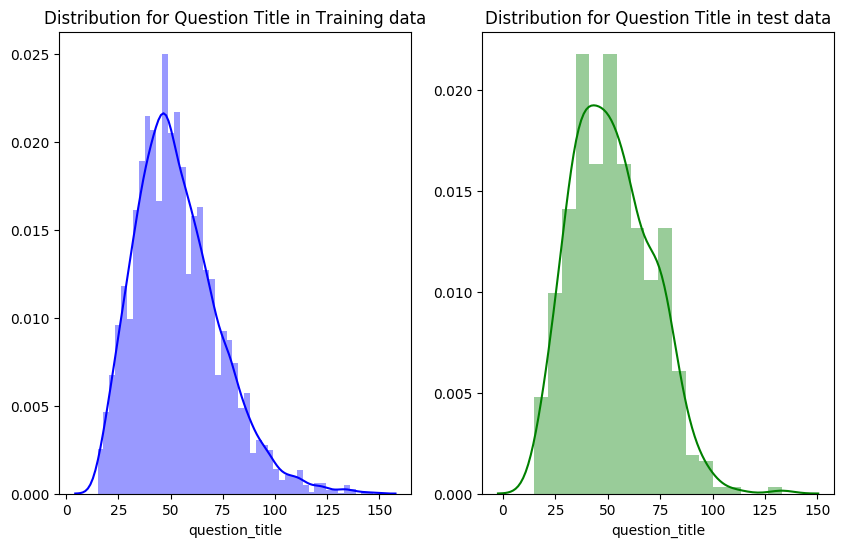

In [38]:
train_question_title=train_df['question_title'].str.len()
test_question_title=test_df['question_title'].str.len()
fig,(ax1,ax2)=plt.subplots(1,2,figsize=(10,6))
sns.distplot(train_question_title,ax=ax1,color='blue')
sns.distplot(test_question_title,ax=ax2,color='green')
ax2.set_title('Distribution for Question Title in test data')
ax1.set_title('Distribution for Question Title in Training data')
plt.show()

# Distribution of question body

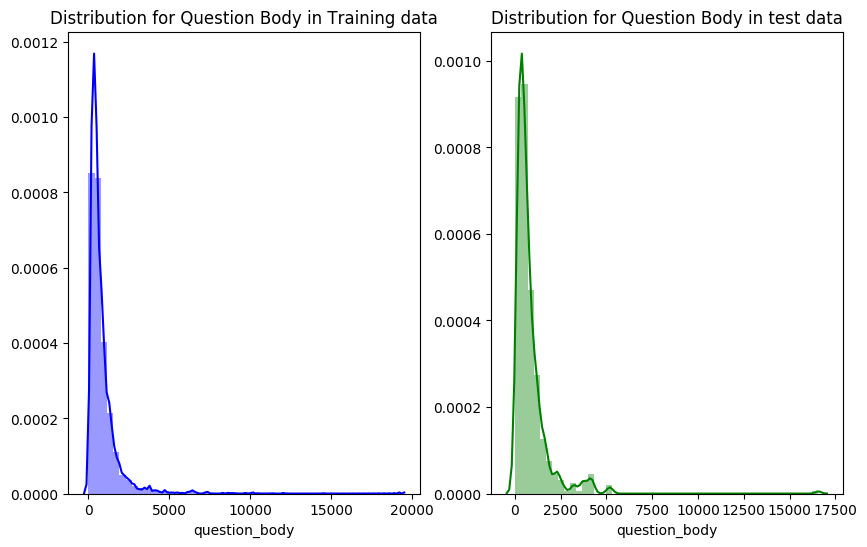

In [46]:
train_question_title=train_df['question_body'].str.len()
test_question_title=test_df['question_body'].str.len()
fig,(ax1,ax2)=plt.subplots(1,2,figsize=(10,6))
sns.distplot(train_question_title,ax=ax1,color='blue')
sns.distplot(test_question_title,ax=ax2,color='green')
ax2.set_title('Distribution for Question Body in test data')
ax1.set_title('Distribution for Question Body in Training data')
plt.show()

# Distribution for Answers

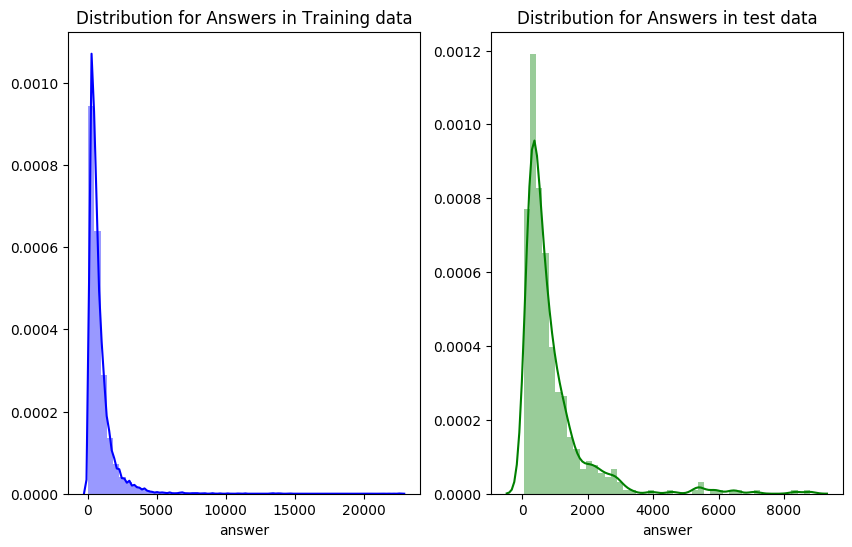

In [47]:
train_question_title=train_df['answer'].str.len()
test_question_title=test_df['answer'].str.len()
fig,(ax1,ax2)=plt.subplots(1,2,figsize=(10,6))
sns.distplot(train_question_title,ax=ax1,color='blue')
sns.distplot(test_question_title,ax=ax2,color='green')
ax2.set_title('Distribution for Answers in test data')
ax1.set_title('Distribution for Answers in Training data')
plt.show()

# Duplicate Question Title and Most Popular Question

In [48]:
print("Number of duplicate questions in descending order")
print("------------------------------------------------------")
train_df.groupby('question_title').count()['qa_id'].sort_values(ascending=False).head(25)


Number of duplicate questions in descending order
------------------------------------------------------


question_title
What is the best introductory Bayesian statistics textbook?                        12
What does mathematics have to do with programming?                                 11
Important non-technical course for programmers?                                    11
How to prevent the "Too awesome to use" syndrome                                    9
Another instructor is pushing me out of the classroom right after my class ends     7
No sound in Ubuntu except at log in                                                 7
How do I deal with a slow and undedicated colleague in the team?                    7
What are the benefits of owning a physical book?                                    7
House rules to make the cloister less of a game winning tile in Carcassonne?        6
Making sure that you have comprehended a concept                                    6
hide javascript/jquery scripts from html page?                                      6
What is the best place to start Warhamm

In [49]:
train_df[train_df['question_title'] == 'What is the best introductory Bayesian statistics textbook?']

,qa_id,question_title,question_body,question_user_name,question_user_page,answer,answer_user_name,answer_user_page,url,category,...,question_well_written,answer_helpful,answer_level_of_information,answer_plausible,answer_relevance,answer_satisfaction,answer_type_instructions,answer_type_procedure,answer_type_reason_explanation,answer_well_written
229,366,What is the best introductory Bayesian statist...,Which is the best introductory textbook for Ba...,Shane,https://stats.stackexchange.com/users/5,"""Bayesian Core: A Practical Approach to Comput...",gappy,https://stats.stackexchange.com/users/30,http://stats.stackexchange.com/questions/125/w...,SCIENCE,...,1.000000,0.777778,0.666667,1.000000,1.000000,0.933333,0.0,0.0,0.000000,1.000000
1616,2536,What is the best introductory Bayesian statist...,Which is the best introductory textbook for Ba...,Shane,https://stats.stackexchange.com/users/5,I am now reading : From Algorithm to Z-Scores:...,Fabio,https://stats.stackexchange.com/users/40316,http://stats.stackexchange.com/questions/125/w...,SCIENCE,...,1.000000,0.555556,0.444444,1.000000,0.888889,0.666667,0.0,0.0,0.000000,0.777778
1647,2591,What is the best introductory Bayesian statist...,Which is the best introductory textbook for Ba...,Shane,https://stats.stackexchange.com/users/5,"My favorite is ""Bayesian Data Analysis"" by Gel...",Shane,https://stats.stackexchange.com/users/5,http://stats.stackexchange.com/questions/125/w...,SCIENCE,...,0.888889,0.888889,0.666667,1.000000,1.000000,1.000000,0.0,0.0,0.000000,1.000000
2104,3349,What is the best introductory Bayesian statist...,Which is the best introductory textbook for Ba...,Shane,https://stats.stackexchange.com/users/5,I have read some parts of A First Course in Ba...,George Dontas,https://stats.stackexchange.com/users/339,http://stats.stackexchange.com/questions/125/w...,SCIENCE,...,1.000000,0.777778,0.555556,1.000000,1.000000,0.800000,0.0,0.0,0.000000,0.888889
3476,5543,What is the best introductory Bayesian statist...,Which is the best introductory textbook for Ba...,Shane,https://stats.stackexchange.com/users/5,"Sivia and Skilling, Data analysis: a Bayesian ...",denis,https://stats.stackexchange.com/users/557,http://stats.stackexchange.com/questions/125/w...,SCIENCE,...,0.833333,1.000000,0.666667,1.000000,1.000000,0.800000,0.0,0.0,0.666667,1.000000
3762,5989,What is the best introductory Bayesian statist...,Which is the best introductory textbook for Ba...,Shane,https://stats.stackexchange.com/users/5,If I had to choose a single text for a beginne...,Jim Stone,https://stats.stackexchange.com/users/26779,http://stats.stackexchange.com/questions/125/w...,SCIENCE,...,1.000000,1.000000,1.000000,1.000000,1.000000,0.933333,0.0,0.0,1.000000,1.000000
3801,6041,What is the best introductory Bayesian statist...,Which is the best introductory textbook for Ba...,Shane,https://stats.stackexchange.com/users/5,"Take a look at ""The Bayesian Choice"". It has t...",Zen,https://stats.stackexchange.com/users/9394,http://stats.stackexchange.com/questions/125/w...,SCIENCE,...,1.000000,1.000000,0.666667,1.000000,1.000000,1.000000,0.0,0.0,0.000000,1.000000
3899,6215,What is the best introductory Bayesian statist...,Which is the best introductory textbook for Ba...,Shane,https://stats.stackexchange.com/users/5,I found an excellent introduction in Gelman an...,Jack Tanner,https://stats.stackexchange.com/users/8207,http://stats.stackexchange.com/questions/125/w...,SCIENCE,...,1.000000,1.000000,0.666667,1.000000,1.000000,0.933333,0.0,0.0,0.333333,1.000000
4408,7003,What is the best introductory Bayesian statist...,Which is the best introductory textbook for Ba...,Shane,https://stats.stackexchange.com/users/5,Its focus isn't strictly on Bayesian statistic...,Joe,https://stats.stackexchange.com/users/1119,http://stats.stackexchange.com/questions/125/w...,SCIENCE,...,0.888889,0.777778,0.666667,1.000000,1.000000,1.000000,0.0,0.0,0.000000,1.000000
5239,8328,What is the best introductory Bayesian statist..

# Data preparation and Feature Engineering

# Data Cleaning

In [56]:
print("Data cleaning started........")
puncts = [',', '.', '"', ':', ')', '(', '-', '!', '?', '|', ';', "'", '$', '&', '/', '[', ']', '>', '%', '=', '#', '*', '+', '\\', '•',  '~', '@', '£',
 '·', '_', '{', '}', '©', '^', '®', '`',  '<', '→', '°', '€', '™', '›',  '♥', '←', '×', '§', '″', '′', 'Â', '█', '½', 'à', '…', '\xa0', '\t',
 '“', '★', '”', '–', '●', 'â', '►', '−', '¢', '²', '¬', '░', '¶', '↑', '±', '¿', '▾', '═', '¦', '║', '―', '¥', '▓', '—', '‹', '─', '\u3000', '\u202f',
 '▒', '：', '¼', '⊕', '▼', '▪', '†', '■', '’', '▀', '¨', '▄', '♫', '☆', 'é', '¯', '♦', '¤', '▲', 'è', '¸', '¾', 'Ã', '⋅', '‘', '∞', '«',
 '∙', '）', '↓', '、', '│', '（', '»', '，', '♪', '╩', '╚', '³', '・', '╦', '╣', '╔', '╗', '▬', '❤', 'ï', 'Ø', '¹', '≤', '‡', '√', ]
mispell_dict = {"aren't" : "are not",
"can't" : "cannot",
"couldn't" : "could not",
"couldnt" : "could not",
"didn't" : "did not",
"doesn't" : "does not",
"doesnt" : "does not",
"don't" : "do not",
"hadn't" : "had not",
"hasn't" : "has not",
"haven't" : "have not",
"havent" : "have not",
"he'd" : "he would",
"he'll" : "he will",
"he's" : "he is",
"i'd" : "I would",
"i'd" : "I had",
"i'll" : "I will",
"i'm" : "I am",
"isn't" : "is not",
"it's" : "it is",
"it'll":"it will",
"i've" : "I have",
"let's" : "let us",
"mightn't" : "might not",
"mustn't" : "must not",
"shan't" : "shall not",
"she'd" : "she would",
"she'll" : "she will",
"she's" : "she is",
"shouldn't" : "should not",
"shouldnt" : "should not",
"that's" : "that is",
"thats" : "that is",
"there's" : "there is",
"theres" : "there is",
"they'd" : "they would",
"they'll" : "they will",
"they're" : "they are",
"theyre":  "they are",
"they've" : "they have",
"we'd" : "we would",
"we're" : "we are",
"weren't" : "were not",
"we've" : "we have",
"what'll" : "what will",
"what're" : "what are",
"what's" : "what is",
"what've" : "what have",
"where's" : "where is",
"who'd" : "who would",
"who'll" : "who will",
"who're" : "who are",
"who's" : "who is",
"who've" : "who have",
"won't" : "will not",
"wouldn't" : "would not",
"you'd" : "you would",
"you'll" : "you will",
"you're" : "you are",
"you've" : "you have",
"'re": " are",
"wasn't": "was not",
"we'll":" will",
"didn't": "did not",
"tryin'":"trying"}


def clean_text(text):
    text = re.sub(r"[^A-Za-z0-9^,!.\/'+-=]", " ", text)
    text = text.lower().split()
    stops = set(stopwords.words("english"))
    text = [w for w in text if not w in stops]    
    text = " ".join(text)
    return(text)

def _get_mispell(mispell_dict):
    mispell_re = re.compile('(%s)' % '|'.join(mispell_dict.keys()))
    return mispell_dict, mispell_re

def replace_typical_misspell(text):
    mispellings, mispellings_re = _get_mispell(mispell_dict)

    def replace(match):
        return mispellings[match.group(0)]

    return mispellings_re.sub(replace, text)

def clean_data(df, columns: list):
    for col in columns:
        df[col] = df[col].apply(lambda x: clean_text(x.lower()))
        df[col] = df[col].apply(lambda x: replace_typical_misspell(x))

    return df

Data cleaning started........


In [57]:
columns = ['question_title','question_body','answer']
train_data = clean_data(train_df, columns)
test_data = clean_data(test_df, columns)
print("Data cleaning Done........")

Data cleaning Done........


# Word Frequency

In [59]:
import nltk
nltk.download('stopwords')

from nltk.corpus import stopwords
stopwords.words("english")

[nltk_data] Downloading package stopwords to /home/user/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


['i',
 'me',
 'my',
 'myself',
 'we',
 'our',
 'ours',
 'ourselves',
 'you',
 "you're",
 "you've",
 "you'll",
 "you'd",
 'your',
 'yours',
 'yourself',
 'yourselves',
 'he',
 'him',
 'his',
 'himself',
 'she',
 "she's",
 'her',
 'hers',
 'herself',
 'it',
 "it's",
 'its',
 'itself',
 'they',
 'them',
 'their',
 'theirs',
 'themselves',
 'what',
 'which',
 'who',
 'whom',
 'this',
 'that',
 "that'll",
 'these',
 'those',
 'am',
 'is',
 'are',
 'was',
 'were',
 'be',
 'been',
 'being',
 'have',
 'has',
 'had',
 'having',
 'do',
 'does',
 'did',
 'doing',
 'a',
 'an',
 'the',
 'and',
 'but',
 'if',
 'or',
 'because',
 'as',
 'until',
 'while',
 'of',
 'at',
 'by',
 'for',
 'with',
 'about',
 'against',
 'between',
 'into',
 'through',
 'during',
 'before',
 'after',
 'above',
 'below',
 'to',
 'from',
 'up',
 'down',
 'in',
 'out',
 'on',
 'off',
 'over',
 'under',
 'again',
 'further',
 'then',
 'once',
 'here',
 'there',
 'when',
 'where',
 'why',
 'how',
 'all',
 'any',
 'both',
 'each

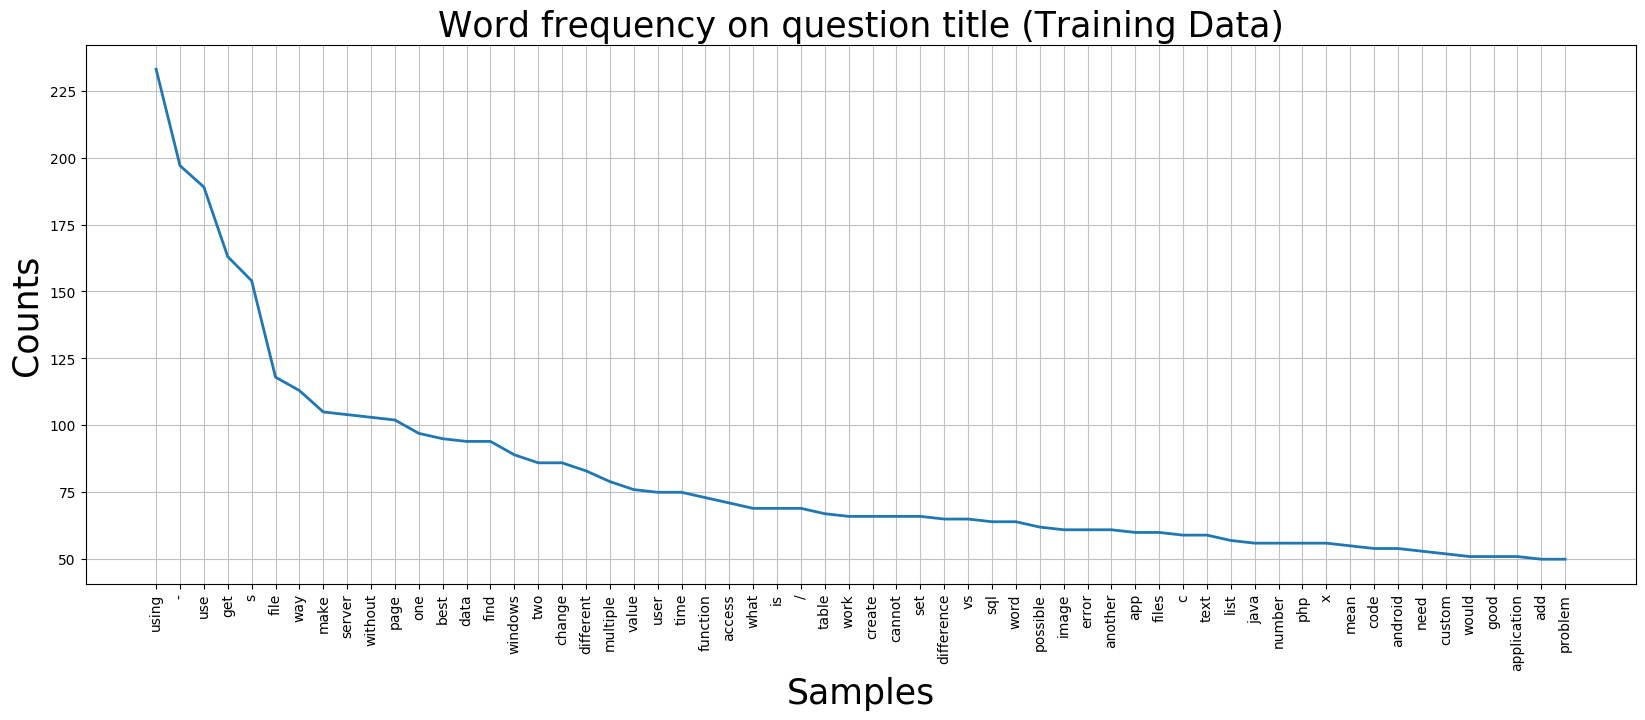

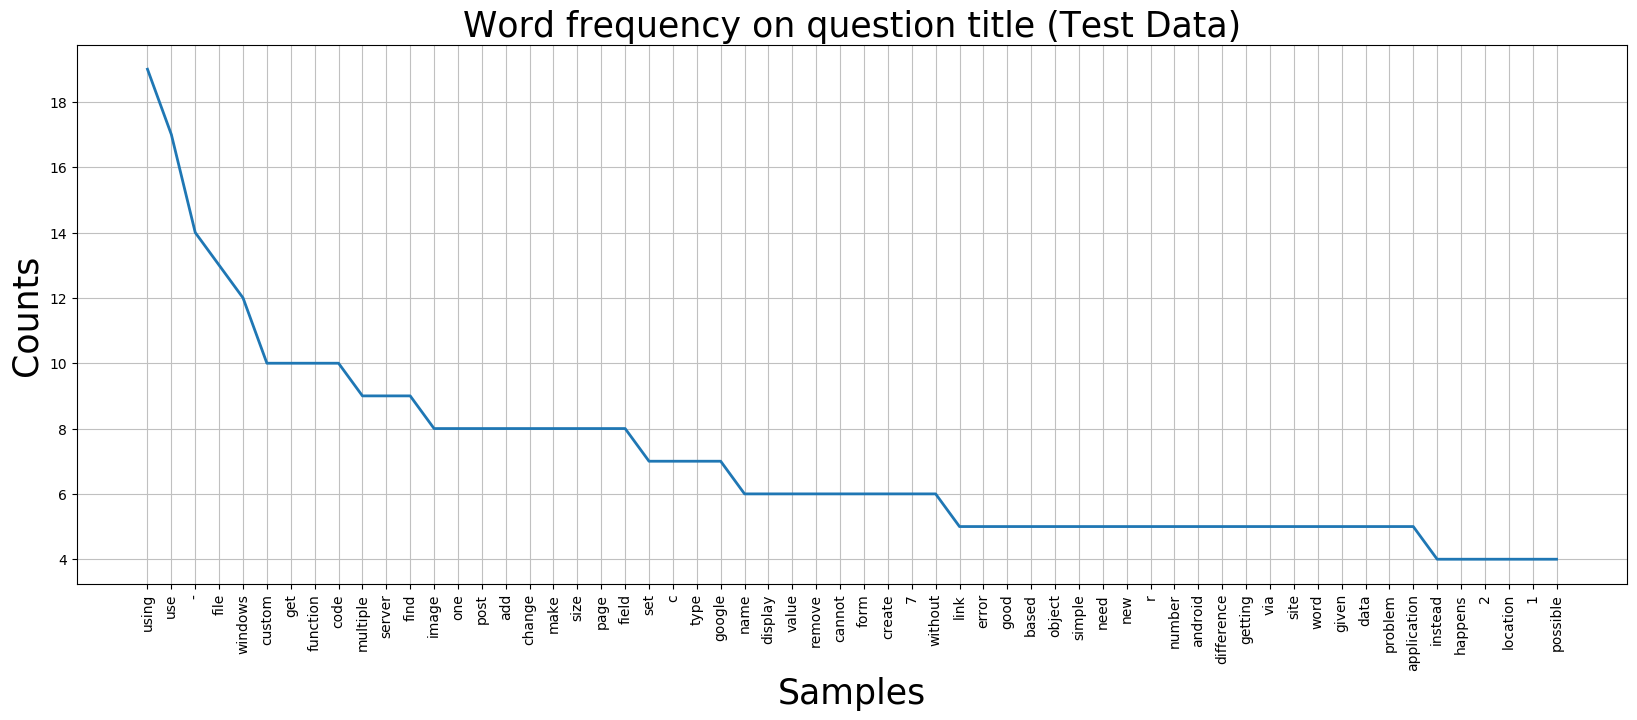

In [62]:
freq_dist = FreqDist([word for text in train_df['question_title'].str.replace('[^a-za-z0-9^,!.\/+-=]',' ') for word in text.split()])
plt.figure(figsize=(20, 7))
plt.title('Word frequency on question title (Training Data)').set_fontsize(25)
plt.xlabel('').set_fontsize(25)
plt.ylabel('').set_fontsize(25)
freq_dist.plot(60,cumulative=False)
plt.show()

# test data
freq_dist = FreqDist([word for text in test_df['question_title'] for word in text.split()])
plt.figure(figsize=(20, 7))
plt.title('Word frequency on question title (Test Data)').set_fontsize(25)
plt.xlabel('').set_fontsize(25)
plt.ylabel('').set_fontsize(25)
freq_dist.plot(60,cumulative=False)
plt.show()


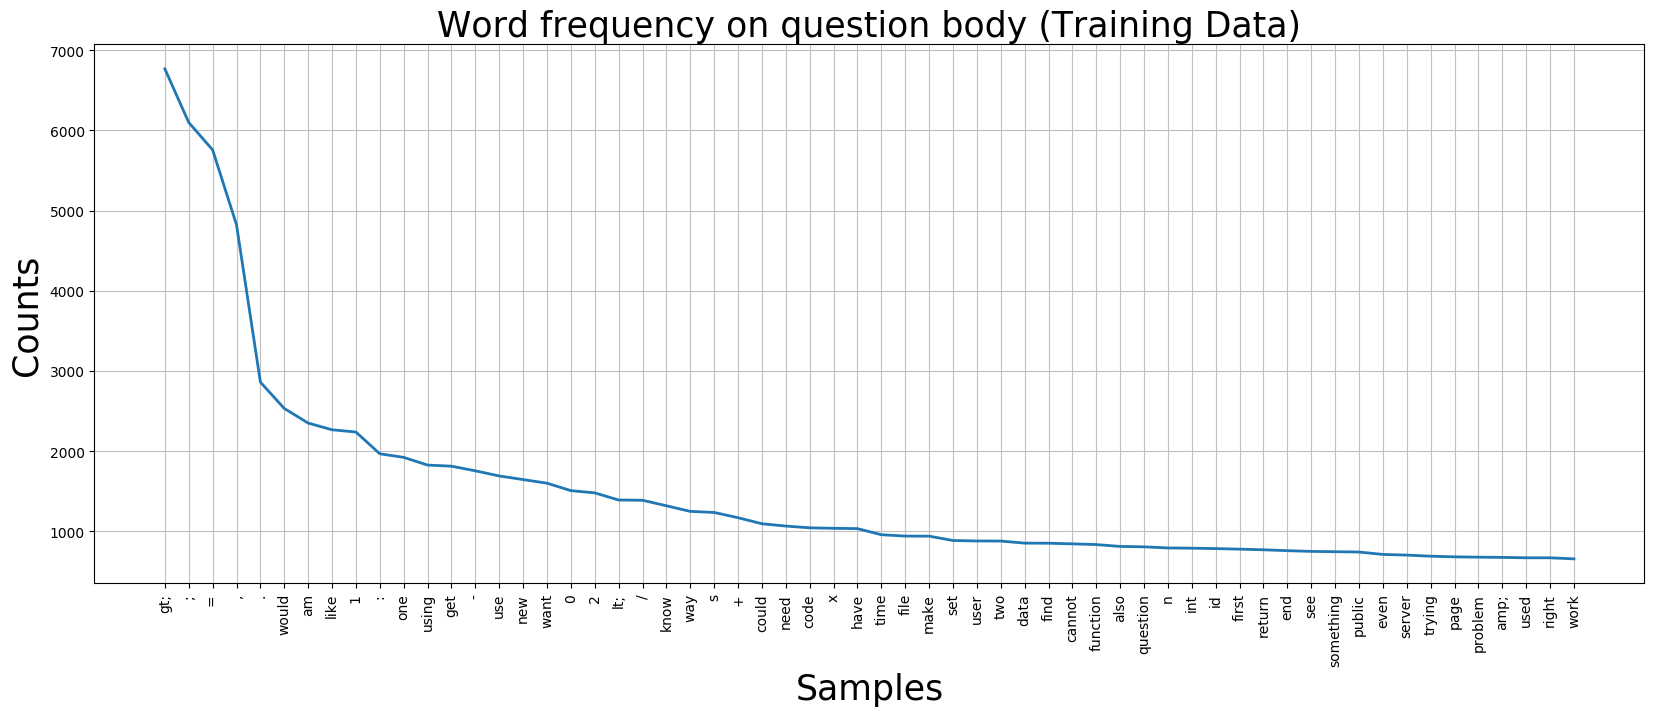

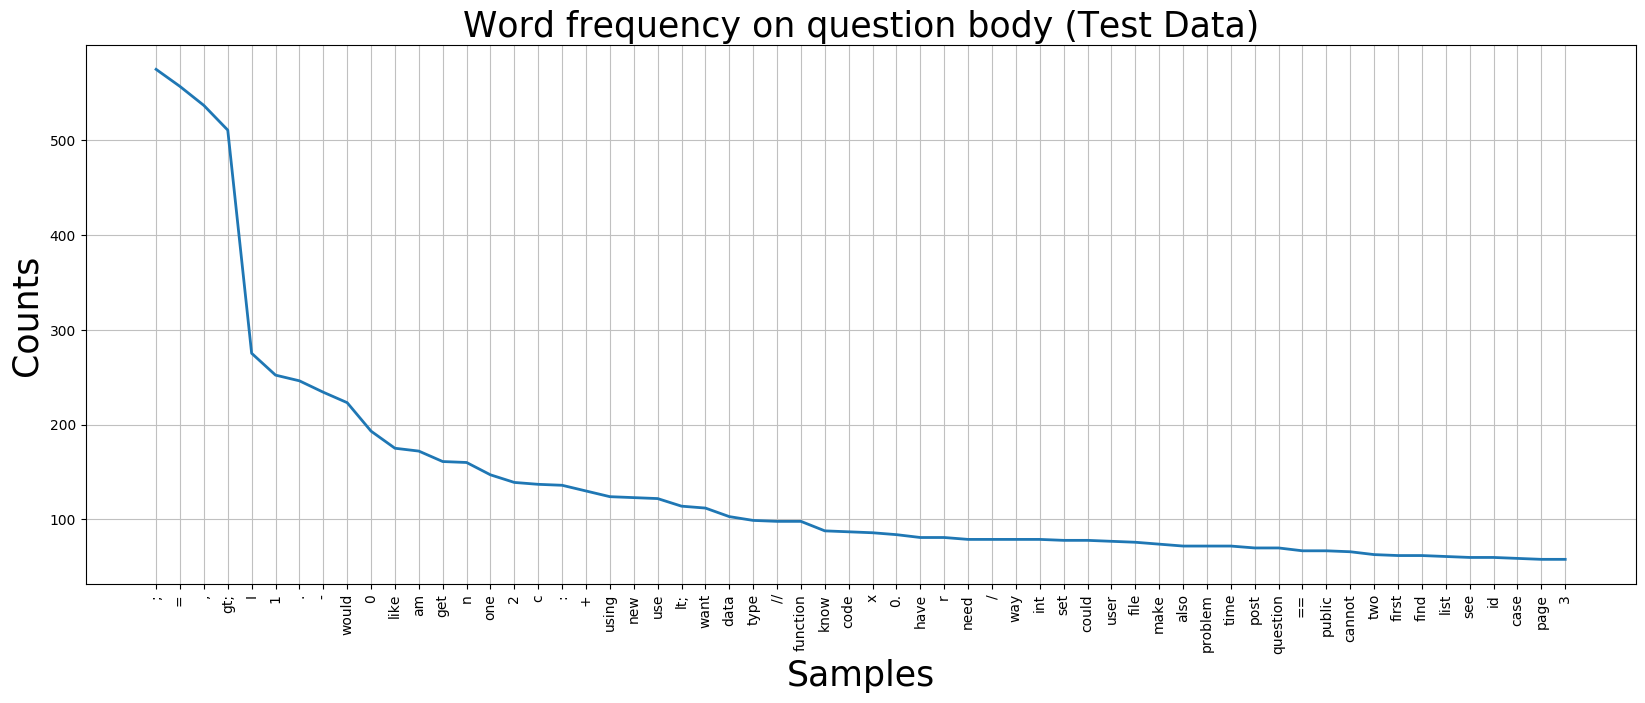

In [63]:
# training data
freq_dist = FreqDist([word for text in train_df['question_body'].str.replace('[^a-za-z0-9^,!.\/+-=]',' ') for word in text.split()])
plt.figure(figsize=(20, 7))
plt.title('Word frequency on question body (Training Data)').set_fontsize(25)
plt.xlabel('').set_fontsize(25)
plt.ylabel('').set_fontsize(25)
freq_dist.plot(60,cumulative=False)
plt.show()

# test data
freq_dist = FreqDist([word for text in test_df['question_body'] for word in text.split()])
plt.figure(figsize=(20, 7))
plt.title('Word frequency on question body (Test Data)').set_fontsize(25)
plt.xlabel('').set_fontsize(25)
plt.ylabel('').set_fontsize(25)
freq_dist.plot(60,cumulative=False)
plt.show()

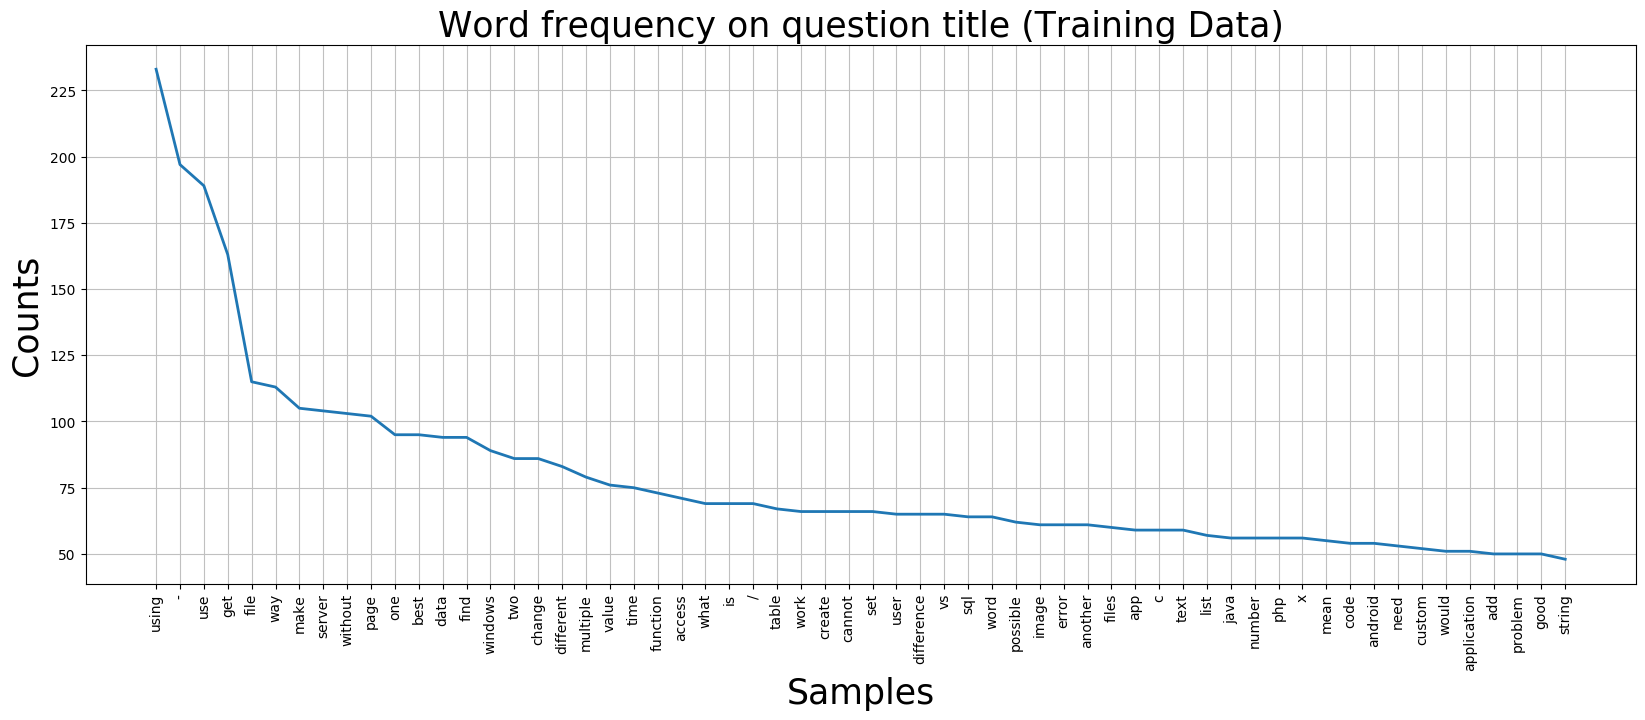

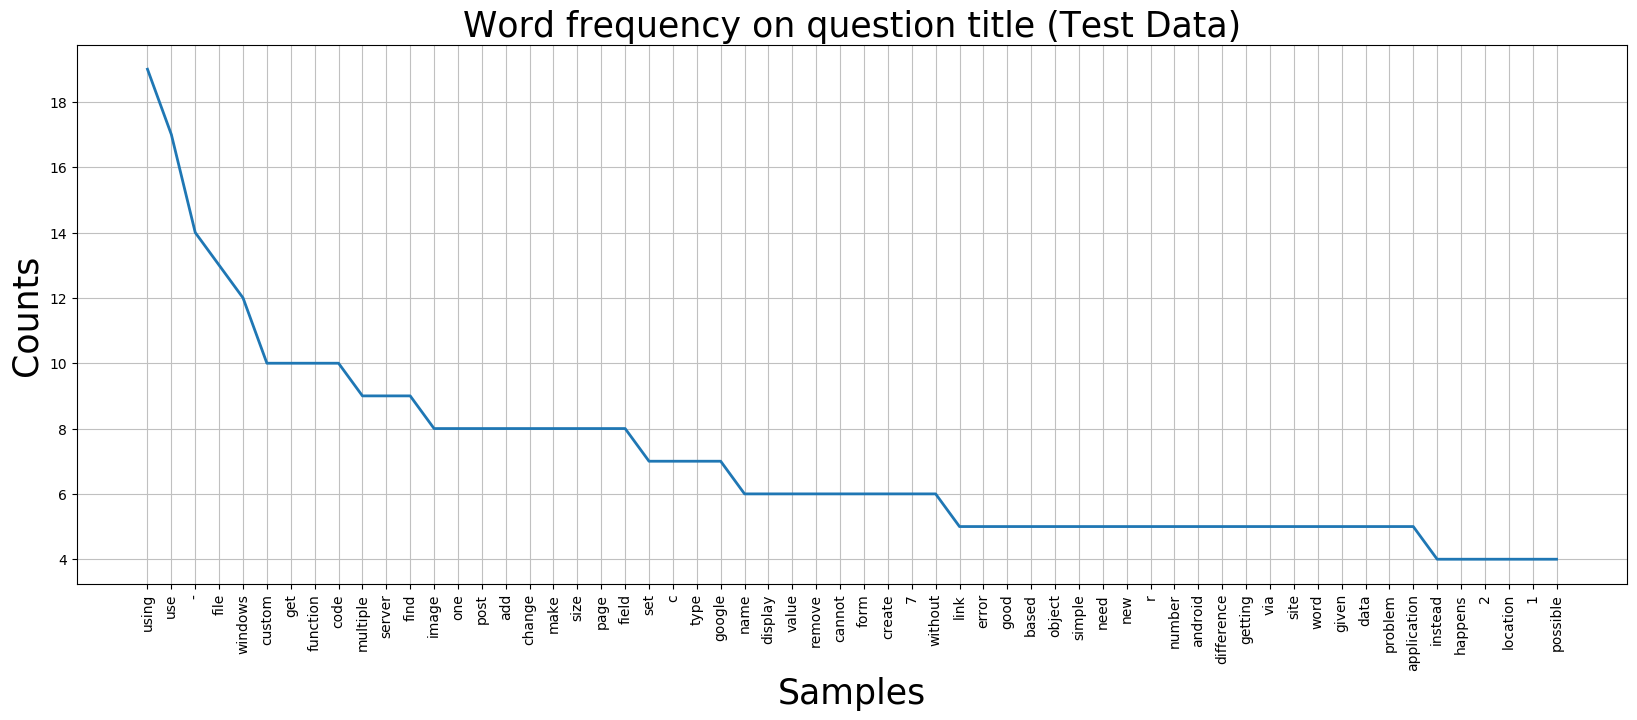

In [64]:
#training data
freq_dist = FreqDist([word for text in train_df['question_title'] for word in text.split()])
plt.figure(figsize=(20, 7))
plt.title('Word frequency on question title (Training Data)').set_fontsize(25)
plt.xlabel('').set_fontsize(25)
plt.ylabel('').set_fontsize(25)
freq_dist.plot(60,cumulative=False)
plt.show()

# test data
freq_dist = FreqDist([word for text in test_df['question_title'] for word in text.split()])
plt.figure(figsize=(20, 7))
plt.title('Word frequency on question title (Test Data)').set_fontsize(25)
plt.xlabel('').set_fontsize(25)
plt.ylabel('').set_fontsize(25)
freq_dist.plot(60,cumulative=False)
plt.show()

# Feature Engineering

In [65]:
#Number of charcayters in text

train_df["question_title_num_chars"] = train_df["question_title"].apply(lambda x: len(str(x)))
train_df["question_body_num_chars"] = train_df["question_body"].apply(lambda x: len(str(x)))
train_df["answer_num_chars"] = train_df["answer"].apply(lambda x: len(str(x)))

test_df["question_title_num_chars"] = test_df["question_title"].apply(lambda x: len(str(x)))
test_df["question_body_num_chars"] = test_df["question_body"].apply(lambda x: len(str(x)))
test_df["answer_num_chars"] = test_df["answer"].apply(lambda x: len(str(x)))

# Number of words in the text
train_df["question_title_num_words"] = train_df["question_title"].apply(lambda x: len(str(x).split()))
train_df["question_body_num_words"] = train_df["question_body"].apply(lambda x: len(str(x).split()))
train_df["answer_num_words"] = train_df["answer"].apply(lambda x: len(str(x).split()))

test_df["question_title_num_words"] = test_df["question_title"].apply(lambda x: len(str(x).split()))
test_df["question_body_num_words"] = test_df["question_body"].apply(lambda x: len(str(x).split()))
test_df["answer_num_words"] = test_df["answer"].apply(lambda x: len(str(x).split()))

# Number of unique words in the text
train_df["question_title_num_unique_words"] = train_df["question_title"].apply(lambda x: len(set(str(x).split())))
train_df["question_body_num_unique_words"] = train_df["question_body"].apply(lambda x: len(set(str(x).split())))
train_df["answer_num_unique_words"] = train_df["answer"].apply(lambda x: len(set(str(x).split())))

test_df["question_title_num_unique_words"] = test_df["question_title"].apply(lambda x: len(set(str(x).split())))
test_df["question_body_num_unique_words"] = test_df["question_body"].apply(lambda x: len(set(str(x).split())))
test_df["answer_num_unique_words"] = test_df["answer"].apply(lambda x: len(set(str(x).split())))

# TF-IDF Features

In [66]:
tfidf = TfidfVectorizer(ngram_range=(1, 3))
tsvd = TruncatedSVD(n_components = 128, n_iter=5)
tfquestion_title = tfidf.fit_transform(train_df["question_title"].values)
tfquestion_title_test = tfidf.transform(test_df["question_title"].values)
tfquestion_title = tsvd.fit_transform(tfquestion_title)
tfquestion_title_test = tsvd.transform(tfquestion_title_test)

tfquestion_body = tfidf.fit_transform(train_df["question_body"].values)
tfquestion_body_test = tfidf.transform(test_df["question_body"].values)
tfquestion_body = tsvd.fit_transform(tfquestion_body)
tfquestion_body_test = tsvd.transform(tfquestion_body_test)

tfanswer = tfidf.fit_transform(train_df["answer"].values)
tfanswer_test = tfidf.transform(test_df["answer"].values)
tfanswer = tsvd.fit_transform(tfanswer)
tfanswer_test = tsvd.transform(tfanswer_test)

In [67]:
train_df["tfquestion_title"] = list(tfquestion_title)
test_df["tfquestion_title_test"] = list(tfquestion_title_test)

train_df["tfquestion_body"] = list(tfquestion_body)
test_df["tfquestion_body_test"] = list(tfquestion_body_test)

train_df["tfanswer"] = list(tfanswer)
test_df["tfanswer_test"] = list(tfanswer_test)